# UX Task Flow Agent

__Author:__ Leslie A. McFarlin, Principal UX Architect   

Submission for the Google 5-Day AI Agents Intensive.

**Category:** Enterprise Agents

**Summary:** Creates user flows in Mermaid that users can then edit as necessary. The agent will also generate .mmd files and PNG files of the flows it creates. It's the .mmd files that can be edited in greater detail by the user if needed, and then pasted into [Mermaid Live Editor](https://mermaid.live/).

In [1]:
# General imports
import os
import sys
import uuid
from dotenv import load_dotenv
from google.genai import types

# Diagramming
from IPython.display import Image, display
from PIL import Image as im
from mermaid import Mermaid
import matplotlib.pyplot as plt

In [2]:
# Custom modules
sys.path.append("lib")

# Autoreload
%load_ext autoreload
%autoreload 2

# custom modules
from agent_diagram import mm, builder_tool_graph
from lib.config import APP_NAME
from lib.agents.taskflow_agent import agent_task_builder, session_service, memory_service, runner
from lib.tools.support import run_session

App name mismatch detected. The runner is configured with app name "UX_TASKFLOW_BUILDER_APP", but the root agent was loaded from "C:\Users\lesli\OneDrive\Desktop\Python Projects\ux_diagram_agent\.venv\Lib\site-packages\google\adk\agents", which implies app name "agents".


## How This Agent Works

This agent takes natural language from a user and converts into a JSON that is then translated by tools into a diagram. That diagram is created via Mermaid.

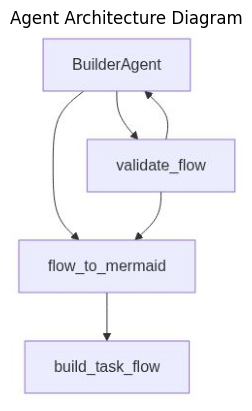

In [3]:
# Draw the Agent Architecture
mm(builder_tool_graph)

In [4]:
# USER_ID and SESSION_ID
USER_ID = str(uuid.uuid4())
SESSION_ID = str(uuid.uuid4())

I will define a local helper function next to facilitate communications with the LLM. With this function, a user can interact directly with the agent from the notebook without having to pass all of the details for ```run_session()``` each time.

__How to Use Chat__

Call this after your initial query in the session (which should be done via ```await run_session()```)
1. Construct an input string. Example:
   ```
   # Input string
   user_input = """
   Create a simple user login flow. It should start with users landing on the login page.
   Then users should input either a username or email, and a password.
   If credentials are correct, the user logs into the system. If the credentials are incorrect, display an error.
   """
   ```
2. Pass the input string to chat. Example:
```
await chat(user_input)
```

This approach minimizes the load on the user, improving the user experience for Agent interactions via notebook.

In [5]:
# Wrapper for conversations
async def chat(query: str):
    '''
    Async wrapper for chat functionality to avoid always passing run_session arguments
    
    :param query: user inputs to the LLM agent
    :type query: str
    '''
    await run_session(
        runner_instance=runner,
        user_queries=query,
        session_service=session_service,
        memory_service=memory_service,
        user_id=USER_ID,
        session_id=SESSION_ID
)

In [6]:
# Test query
test_query = """
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.
"""

# To start, just use await run_session()
await run_session(
        runner_instance=runner,
        user_queries=test_query,
        session_service=session_service,
        memory_service=memory_service,
        user_id=USER_ID,
        session_id=SESSION_ID
)


##### Session: 74b87bc7-67e5-4ad3-aa82-cdc9157aeff6
Session created for: UX_TASKFLOW_BUILDER_APP, 080c41b3-cd30-4cb1-bb78-fce20ea16368, 74b87bc7-67e5-4ad3-aa82-cdc9157aeff6

User > 
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.

[2025-11-27T17:57:34] [query_start] user_id=080c41b3-cd30-4cb1-bb78-fce20ea16368 session_id=74b87bc7-67e5-4ad3-aa82-cdc9157aeff6 query=
Build a simple user login flow. Start with the user landing on the login page. 
Then they should be entering their credentials.
If they are successful, they will be taken to a dashboard. If not successful, show an error.

Model > I will create a user login flow that starts with the user on the login page, followed by entering credentials. If successful, the user proceeds to the dashboard. If unsuccessful, an error message is displayed.

Do you want to inc


##### Session: 74b87bc7-67e5-4ad3-aa82-cdc9157aeff6
Session already exists for: UX_TASKFLOW_BUILDER_APP, 080c41b3-cd30-4cb1-bb78-fce20ea16368, 74b87bc7-67e5-4ad3-aa82-cdc9157aeff6

User > 
Yes, please include a forgotten password path.
Allow 3 retries before locking out of an account.

[2025-11-27T17:58:11] [query_start] user_id=080c41b3-cd30-4cb1-bb78-fce20ea16368 session_id=74b87bc7-67e5-4ad3-aa82-cdc9157aeff6 query=
Yes, please include a forgotten password path.
Allow 3 retries before locking out of an account.



[2025-11-27T17:58:13] [query_complete] user_id=080c41b3-cd30-4cb1-bb78-fce20ea16368 session_id=74b87bc7-67e5-4ad3-aa82-cdc9157aeff6 query=
Yes, please include a forgotten password path.
Allow 3 retries before locking out of an account.
 seconds=2.508 tool_called=False valid=None

========== TASK FLOW ==========
Title: User Login Flow

Validation:
    Valid: True
     No issues found.

Mermaid diagram:

flowchart TD
 start([User lands on login page])
 n1[User enters credentials]
 n2[System validates credentials]
 n3{Credentials valid?}
 n4([User taken to dashboard])
 n5[Show error message]
 n6{Retries remaining?}
 n7([Account locked out])
 n8[User initiates forgot password]
 n9[System sends password reset email]
 n10[User resets password]
 n11([Password reset successful])

Copy this into a Mermaid preview to see the diagram.
Mermaid diagram saved to: User_Login_Flow.mmd
PNG saved to User_Login_Flow.png
[2025-11-27T17:58:14] [query_complete] user_id=080c41b3-cd30-4cb1-bb78-fce20ea16368 s

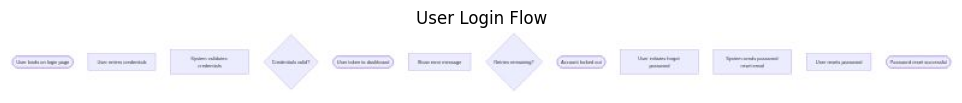

In [7]:
# Follow up chats - update and run if needed.
user_input = """
Yes, please include a forgotten password path.
Allow 3 retries before locking out of an account.
"""

await chat(user_input)